## 1) Problem Statement:

In [30]:
"Hare Krishna"

'Hare Krishna'

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, pearsonr, f_oneway
from sklearn.utils.class_weight import compute_class_weight
from sklearn.datasets import load_iris, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import matthews_corrcoef, precision_recall_curve, auc
from scipy.stats import chi2_contingency
from sklearn.exceptions import UndefinedMetricWarning
import warnings
from scipy.stats import shapiro
from scipy.stats import pointbiserialr
warnings.filterwarnings("ignore", category=pd.core.generic.SettingWithCopyWarning)



In [32]:
df = pd.read_excel('/Users/jaydaksharora/Downloads/Untitled spreadsheet.xlsx')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sample_ID       3784 non-null   object 
 1   Year            3534 non-null   float64
 2   Country         3783 non-null   object 
 3   Continent       3783 non-null   object 
 4   Beta.lactamase  1927 non-null   object 
 5   Azithromycin    3478 non-null   object 
 6   Ciprofloxacin   3127 non-null   object 
 7   Ceftriaxone     3434 non-null   object 
 8   Cefixime        3403 non-null   object 
 9   Tetracycline    1470 non-null   object 
 10  Penicillin      1463 non-null   object 
 11  NG_MAST         3777 non-null   object 
 12  Group           3784 non-null   int64  
 13  azm_mic         3478 non-null   float64
 14  cip_mic         3086 non-null   float64
 15  cro_mic         3432 non-null   float64
 16  cfx_mic         3399 non-null   float64
 17  tet_mic         1470 non-null   f

In [34]:
print(df.columns)

Index(['Sample_ID', 'Year', 'Country', 'Continent', 'Beta.lactamase',
       'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime',
       'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic',
       'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic',
       'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic',
       'log2_pen_mic', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr',
       'pen_sr'],
      dtype='object')


In [35]:
df.drop(['Sample_ID','Year'],inplace=True,axis=1)

In [36]:
categorical= [feature for feature in df.columns if len(df[feature].unique())<=8]
continuous= [feature for feature in df.columns if len(df[feature].unique())>8]
print("categorical variables are: ", categorical)
print("Continous variables are: ",continuous)

categorical variables are:  ['Continent', 'Beta.lactamase', 'azm_sr', 'cip_sr', 'cro_sr', 'cfx_sr', 'tet_sr', 'pen_sr']
Continous variables are:  ['Country', 'Azithromycin', 'Ciprofloxacin', 'Ceftriaxone', 'Cefixime', 'Tetracycline', 'Penicillin', 'NG_MAST', 'Group', 'azm_mic', 'cip_mic', 'cro_mic', 'cfx_mic', 'tet_mic', 'pen_mic', 'log2_azm_mic', 'log2_cip_mic', 'log2_cro_mic', 'log2_cfx_mic', 'log2_tet_mic', 'log2_pen_mic']


In [37]:
df[continuous] = df[continuous].replace({'S': np.nan, 's': np.nan})

In [38]:
len(continuous)

21

In [39]:
len(categorical)

8

In [40]:
df1=df

In [41]:
df_azm = df[['Continent', 'NG_MAST', 'Group', 'azm_mic', 'azm_sr']]
df_cip = df[['Continent', 'NG_MAST', 'Group', 'cip_mic', 'cip_sr']]
df_cfx = df[['Continent', 'NG_MAST', 'Group', 'cfx_mic', 'cfx_sr']]

In [42]:
for column in df_azm.columns:
    if df_azm[column].nunique() > 8:
        df_azm[column] = df_azm[column].astype(str)
        df_azm[column] = df_azm[column].str.replace('<=', '')
        df_azm[column] = df_azm[column].str.replace('>=', '')
        df_azm[column] = df_azm[column].str.replace('>', '')
        df_azm[column] = df_azm[column].str.replace('<', '')
        df_azm[column] = df_azm[column].replace('nan', np.nan)
        df_azm[column] = pd.to_numeric(df_azm[column].replace('-', '-1'),errors='coerce')
for column in df_cip.columns:
    if df_cip[column].nunique() > 8:
        df_cip[column] = df_cip[column].astype(str)
        df_cip[column] = df_cip[column].str.replace('<=', '')
        df_cip[column] = df_cip[column].str.replace('>=', '')
        df_cip[column] = df_cip[column].str.replace('>', '')
        df_cip[column] = df_cip[column].str.replace('<', '')
        df_cip[column] = df_cip[column].replace('nan', np.nan)
        df_cip[column] = pd.to_numeric(df_cip[column].replace('-', '-1'), errors='coerce')
for column in df_cfx.columns:
    if df_cfx[column].nunique() > 8:
        df_cfx[column] = df_cfx[column].astype(str)
        df_cfx[column] = df_cfx[column].str.replace('<=', '')
        df_cfx[column] = df_cfx[column].str.replace('>=', '')
        df_cfx[column] = df_cfx[column].str.replace('>', '')
        df_cfx[column] = df_cfx[column].str.replace('<', '')
        df_cfx[column] = df_cfx[column].replace('nan', np.nan)
        df_cfx[column] = pd.to_numeric(df_cfx[column].replace('-', '-1'), errors='coerce')

In [43]:
for column in df_azm.columns:
    if df_azm[column].nunique() <= 8:
        df_azm[column] = df_azm[column].replace('nan', np.nan)
df_azm.dropna(inplace=True)
for column in df_cip.columns:
    if df_cip[column].nunique() <= 8:
        df_cip[column] = df_cip[column].replace('nan', np.nan)
df_cip.dropna(inplace=True)

for column in df_cfx.columns:
    if df_cfx[column].nunique() <= 8:
        df_cfx[column] = df_cfx[column].replace('nan', np.nan)
df_cfx.dropna(inplace=True)


## 2) EDA

## Analysing Relation of Continents with Drugs

In [44]:
contingency_table = pd.crosstab(df_azm['Continent'], df_azm['azm_sr'])

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

if(p_val<0.05):
    print(p_val,':Yes, there is a relation')
else:
    print('No Relation')

1.5509446094329929e-21 :Yes, there is a relation


In [45]:
contingency_table = pd.crosstab(df_cip['Continent'], df_cip['cip_sr'])

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

if(p_val<0.05):
    print(p_val,':Yes, there is a relation')
else:
    print('No Relation')

7.707538508918247e-21 :Yes, there is a relation


In [46]:
contingency_table = pd.crosstab(df_cfx['Continent'], df_cfx['cfx_sr'])

chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

if(p_val<0.05):
    print(p_val,':Yes, there is a relation')
else:
    print('No Relation')

No Relation


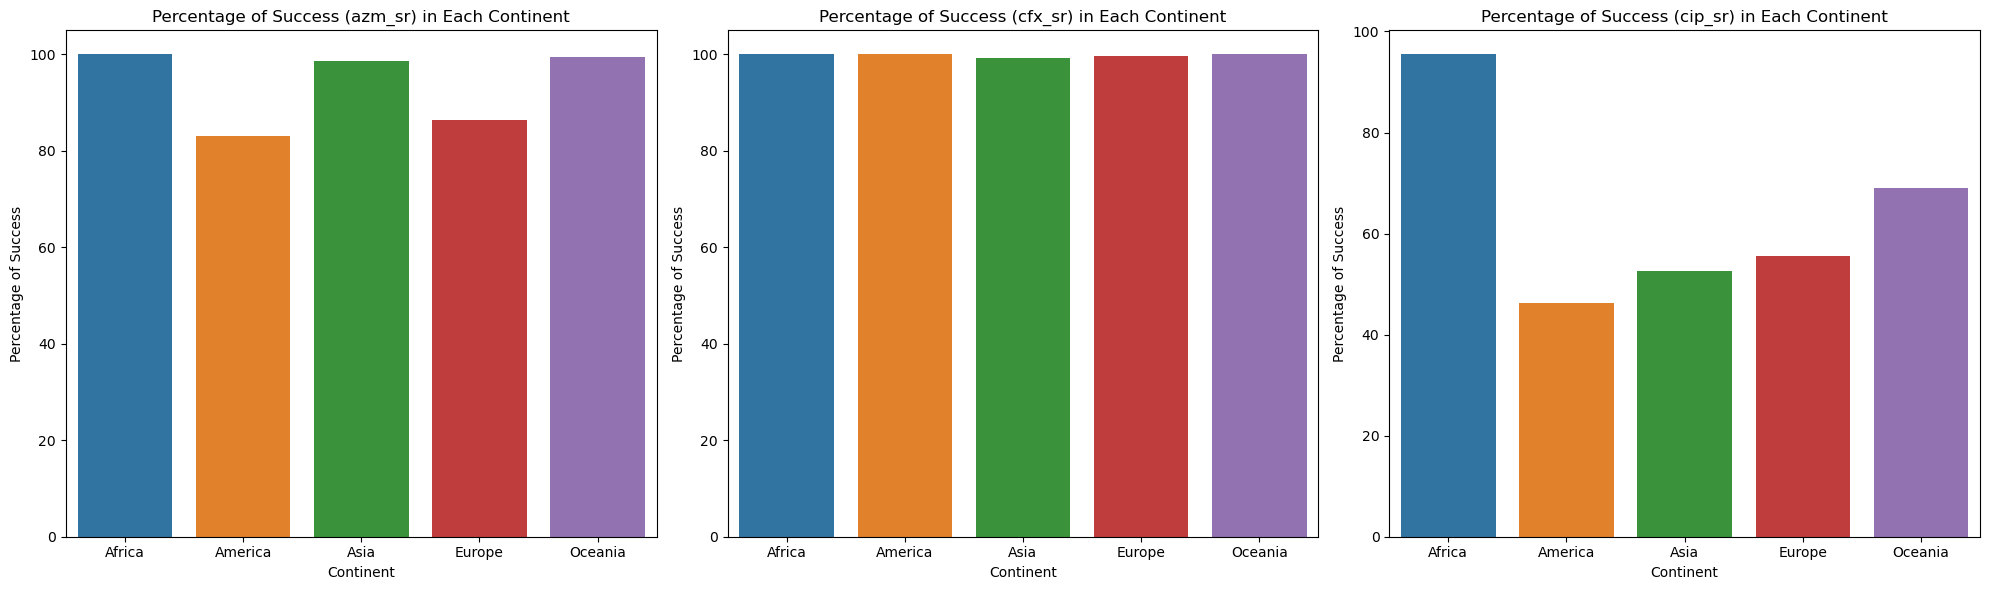

In [47]:
def plot_percentage_of_success(df, sr_column, title, ax):
    df[sr_column] = df[sr_column].astype(str)
    success_percentage = df[df[sr_column] == '0.0'].groupby('Continent').size() / df.groupby('Continent').size() * 100
    sns.barplot(x=success_percentage.index, y=success_percentage.values, ax=ax)
    ax.set_xlabel('Continent')
    ax.set_ylabel('Percentage of Success')
    ax.set_title(f'Percentage of Success ({title}) in Each Continent')

# Create subplots for the first set of plots
fig, axes1 = plt.subplots(1, 3, figsize=(20, 6))

# Plot for df_azm
plot_percentage_of_success(df_azm, 'azm_sr', 'azm_sr', axes1[0])

# Plot for df_cip
plot_percentage_of_success(df_cip, 'cip_sr', 'cip_sr', axes1[2])

# Plot for df_cfx
plot_percentage_of_success(df_cfx, 'cfx_sr', 'cfx_sr', axes1[1])

plt.tight_layout()
plt.show()



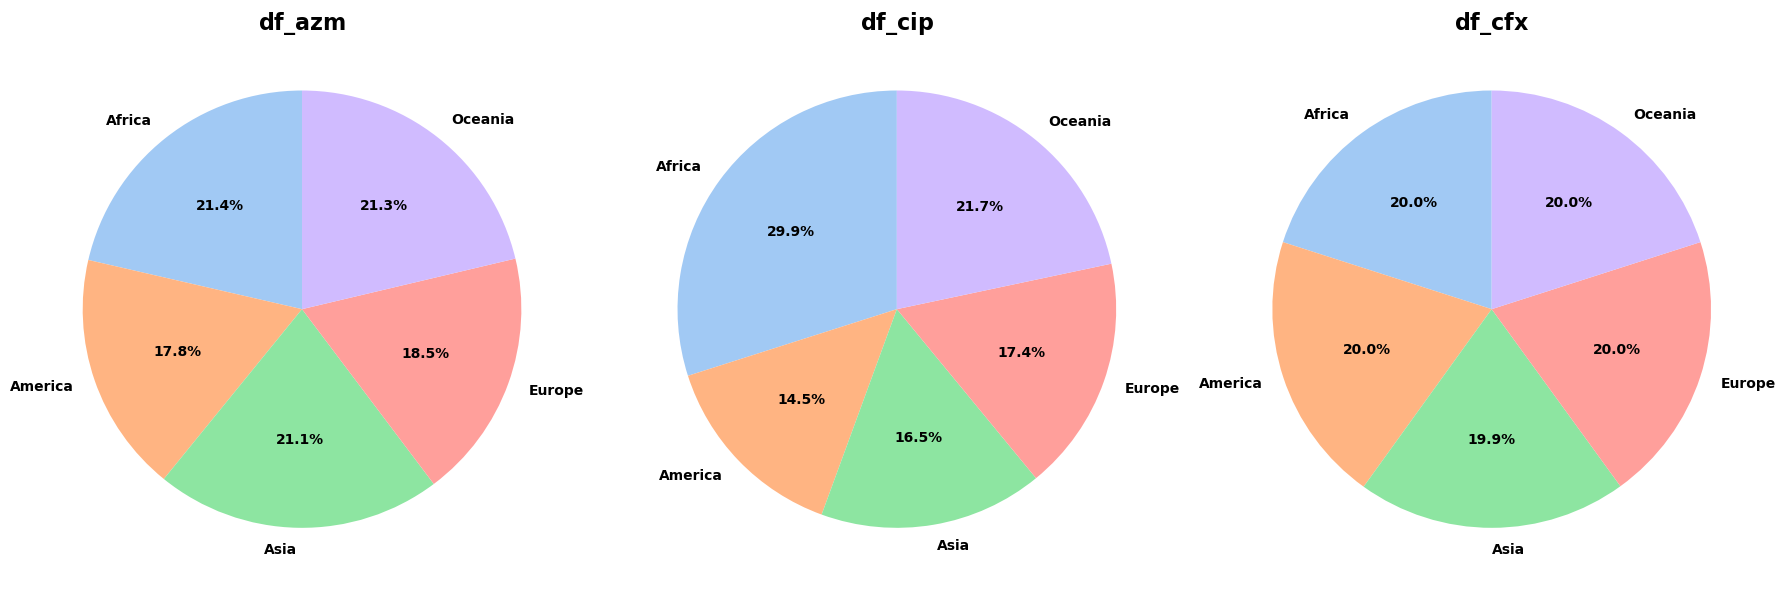

In [48]:
def plot_percentage_of_success_pie(df, sr_column, title, ax):
    df[sr_column] = df[sr_column].astype(str)
    success_percentage = df[df[sr_column] == '0.0'].groupby('Continent').size() / df.groupby('Continent').size() * 100
    colors = sns.color_palette('pastel')
    
    wedges, texts, autotexts = ax.pie(success_percentage.values, labels=success_percentage.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    for text, autotext in zip(texts, autotexts):
        text.set(fontweight='bold', color='black')
        autotext.set(fontweight='bold', color='black')

    ax.axis('equal')
    ax.set_title(f'$\\bf{{Percentage\ of\ Success}}$ ({title}) in Each Continent', fontsize=14)

# Create subplots for the pie charts side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot for df_azm
plot_percentage_of_success_pie(df_azm, 'azm_sr', 'azm_sr', ax1)
ax1.set_title('$\\bf{df\_azm}$', fontsize=16)

# Plot for df_cip
plot_percentage_of_success_pie(df_cip, 'cip_sr', 'cip_sr', ax2)
ax2.set_title('$\\bf{df\_cip}$', fontsize=16)

# Plot for df_cfx
plot_percentage_of_success_pie(df_cfx, 'cfx_sr', 'cfx_sr', ax3)
ax3.set_title('$\\bf{df\_cfx}$', fontsize=16)

plt.tight_layout()
plt.show()


## Observation:
1) Azm is most useful in africa, asia and oceania
2) Cfx is useful in throughout
3) CIP is most useful in Africa
                

## Relations between MICs

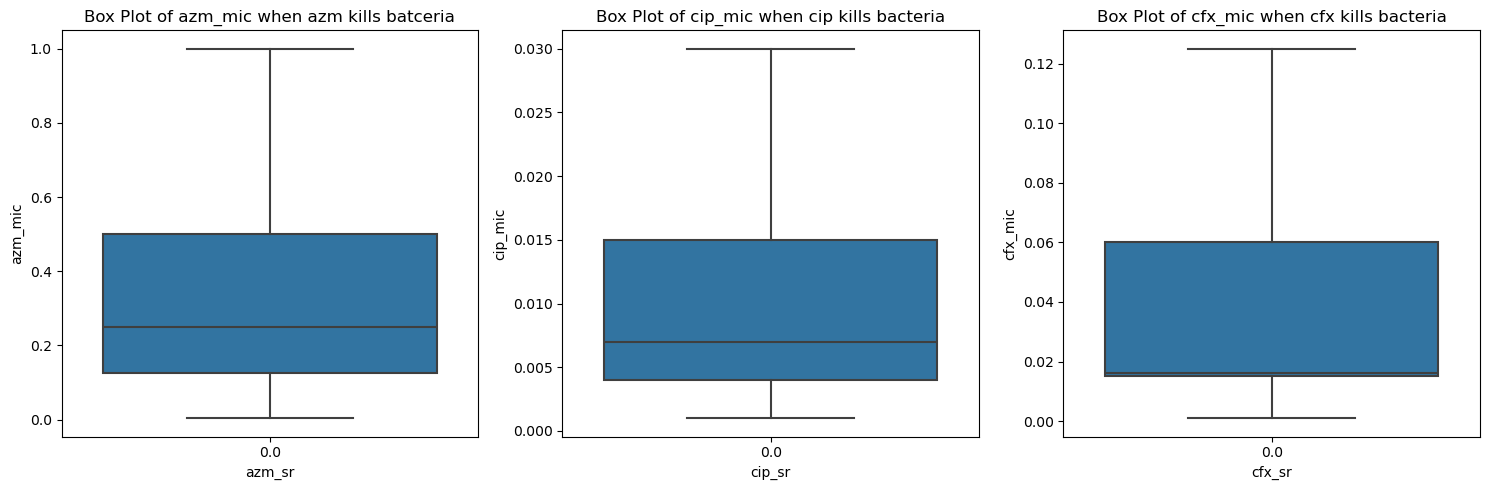

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

filtered_df_azm = df[df['azm_sr'] == 0]
sns.boxplot(x='azm_sr', y='azm_mic', data=filtered_df_azm, sym='', showfliers=False, ax=axes[0])
axes[0].set_xlabel('azm_sr')
axes[0].set_ylabel('azm_mic')
axes[0].set_title('Box Plot of azm_mic when azm kills batceria')

filtered_df_cip = df[df['cip_sr'] == 0]
sns.boxplot(x='cip_sr', y='cip_mic', data=filtered_df_cip, sym='', showfliers=False, ax=axes[1])
axes[1].set_xlabel('cip_sr')
axes[1].set_ylabel('cip_mic')
axes[1].set_title('Box Plot of cip_mic when cip kills bacteria')

filtered_df_cfx = df[df['cfx_sr'] == 0]
sns.boxplot(x='cfx_sr', y='cfx_mic', data=filtered_df_cfx, sym='', showfliers=False, ax=axes[2])
axes[2].set_xlabel('cfx_sr')
axes[2].set_ylabel('cfx_mic')
axes[2].set_title('Box Plot of cfx_mic when cfx kills bacteria')

plt.tight_layout()
plt.show()


1) Cfx : Successful in moderate concentrations (0.02 to 0.06)
2) Azm : Successful in high concentrations (0.175 to 0.5)
3) Cip : Successful in small concentrations (0.005 to 0.015)

## NG MAST

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


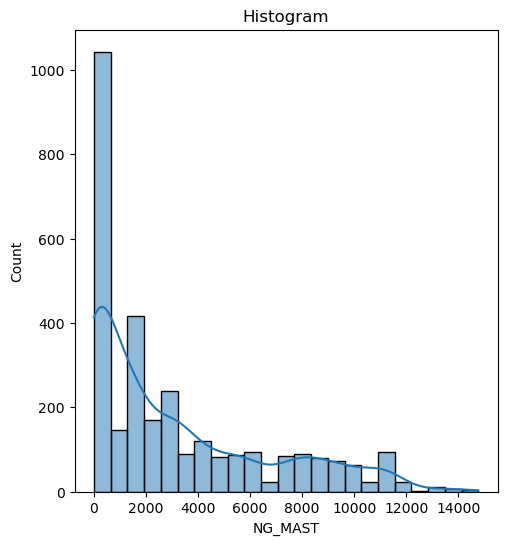

Shapiro-Wilk Test for Normality (p-value): 0.0
The variable NG_MAST is not normally distributed (p-value < 0.05)


In [50]:
continuous_variable = 'NG_MAST'
stat, p_value = shapiro(df_cip[continuous_variable])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cip[continuous_variable], kde=True)
plt.title('Histogram')

plt.show()
print(f"Shapiro-Wilk Test for Normality (p-value): {p_value}")
alpha = 0.05
if p_value < alpha:
    print(f"The variable {continuous_variable} is not normally distributed (p-value < {alpha})")
else:
    print(f"The variable {continuous_variable} appears to be normally distributed (p-value >= {alpha})")


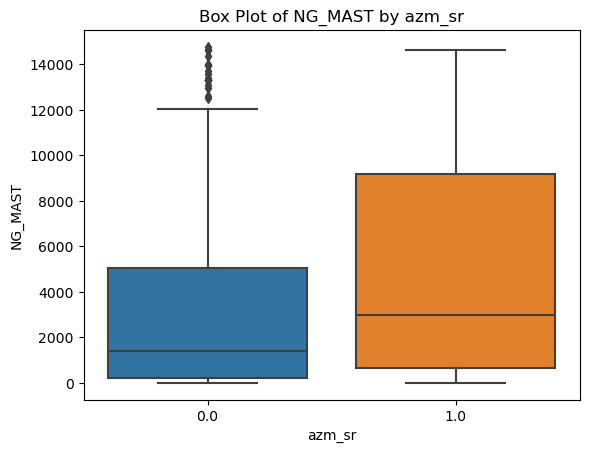

Point-Biserial Correlation between azm_sr and NG_MAST: 0.12797365686501197
p-value: 4.558634798894222e-14


In [51]:
df_azm['azm_sr'] = pd.to_numeric(df_azm['azm_sr'], errors='coerce')
categorical_variable = 'azm_sr'
continuous_variable = 'NG_MAST'
result_pointbiserial = pointbiserialr(df_azm[categorical_variable], df_azm[continuous_variable])
sns.boxplot(x=categorical_variable, y=continuous_variable, data=df_azm)
plt.title(f'Box Plot of {continuous_variable} by {categorical_variable}')
plt.show()
print(f"Point-Biserial Correlation between {categorical_variable} and {continuous_variable}: {result_pointbiserial.correlation}")
print("p-value:", result_pointbiserial.pvalue)


## NG MAST and AZM are related

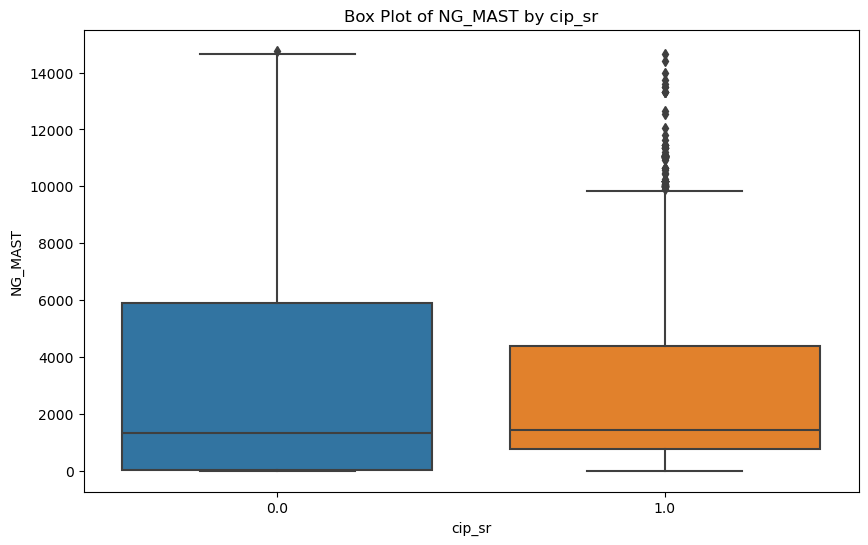

Point-Biserial Correlation between cip_sr and NG_MAST: -0.022601676086293647
p-value: 0.21088428750780386


In [52]:
df_cip['cip_sr'] = pd.to_numeric(df_cip['cip_sr'], errors='coerce')
categorical_variable = 'cip_sr'
continuous_variable = 'NG_MAST'
result_pointbiserial_cip = pointbiserialr(df_cip[categorical_variable], df_cip[continuous_variable])
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_variable, y=continuous_variable, data=df_cip)
plt.title(f'Box Plot of {continuous_variable} by {categorical_variable}')
plt.show()
print(f"Point-Biserial Correlation between {categorical_variable} and {continuous_variable}: {result_pointbiserial_cip.correlation}")
print("p-value:", result_pointbiserial_cip.pvalue)


## NG_MAST and CIP are not co related

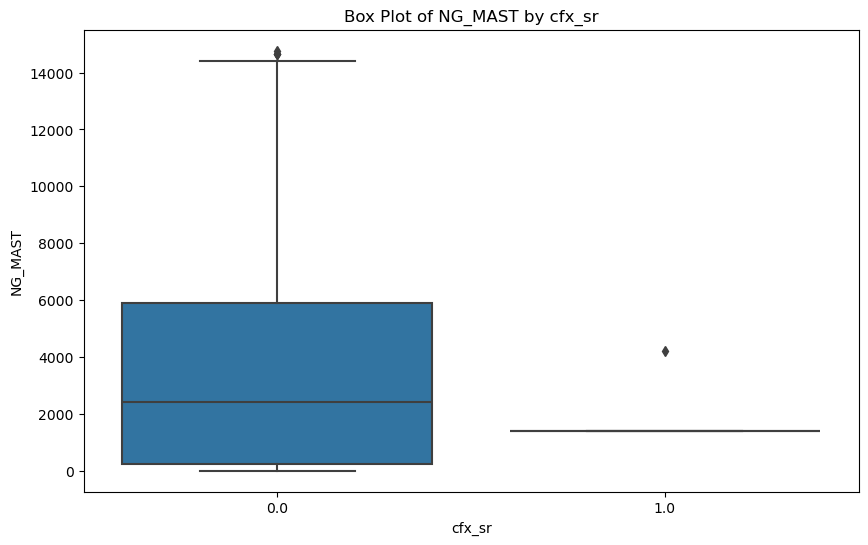

Point-Biserial Correlation between cfx_sr and NG_MAST: -0.016530398985306897
p-value: 0.3370354602263009


In [53]:
df_cfx['cfx_sr'] = pd.to_numeric(df_cfx['cfx_sr'], errors='coerce')
categorical_variable = 'cfx_sr'
continuous_variable = 'NG_MAST'
result_pointbiserial_cfx = pointbiserialr(df_cfx[categorical_variable], df_cfx[continuous_variable])
plt.figure(figsize=(10, 6))
sns.boxplot(x=categorical_variable, y=continuous_variable, data=df_cfx)
plt.title(f'Box Plot of {continuous_variable} by {categorical_variable}')
plt.show()
print(f"Point-Biserial Correlation between {categorical_variable} and {continuous_variable}: {result_pointbiserial_cfx.correlation}")
print("p-value:", result_pointbiserial_cfx.pvalue)


In [54]:
df_cip.drop('NG_MAST',axis=1,inplace=True)
df_cfx.drop('NG_MAST',axis=1,inplace=True)

## CFX and NG_MAST are not correlated

## Relation between Group and target variable

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


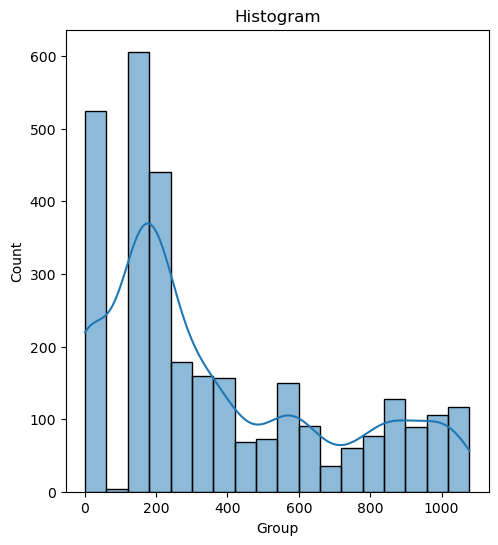

Shapiro-Wilk Test for Normality (p-value): 7.244713060559304e-43
The variable Group is not normally distributed (p-value < 0.05)


In [55]:
continuous_variable = 'Group'
stat, p_value = shapiro(df_cfx[continuous_variable])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cip[continuous_variable], kde=True)
plt.title('Histogram')

plt.show()
print(f"Shapiro-Wilk Test for Normality (p-value): {p_value}")
alpha = 0.05
if p_value < alpha:
    print(f"The variable {continuous_variable} is not normally distributed (p-value < {alpha})")
else:
    print(f"The variable {continuous_variable} appears to be normally distributed (p-value >= {alpha})")


In [56]:
df_azm['azm_sr'] = pd.to_numeric(df_azm['azm_sr'], errors='coerce')
df_cip['cip_sr'] = pd.to_numeric(df_cip['cip_sr'], errors='coerce')
df_cfx['cfx_sr'] = pd.to_numeric(df_cfx['cfx_sr'], errors='coerce')
df_azm['Group'] = pd.to_numeric(df_azm['Group'], errors='coerce')
df_cip['Group'] = pd.to_numeric(df_cip['Group'], errors='coerce')
df_cfx['Group'] = pd.to_numeric(df_cfx['Group'], errors='coerce')
group_variable = 'Group'
result_pointbiserial_azm = pointbiserialr(df_azm['azm_sr'], df_azm[group_variable])
result_pointbiserial_cip = pointbiserialr(df_cip['cip_sr'], df_cip[group_variable])
result_pointbiserial_cfx = pointbiserialr(df_cfx['cfx_sr'], df_cfx[group_variable])
print(f"Point-Biserial Correlation between azm_sr and {group_variable}: {result_pointbiserial_azm.correlation}")
print(f"Point-Biserial Correlation between cip_sr and {group_variable}: {result_pointbiserial_cip.correlation}")
print(f"Point-Biserial Correlation between cfx_sr and {group_variable}: {result_pointbiserial_cfx.correlation}")
alpha = 0.05
print("\nStatistical Significance:")
print(f"azm_sr: {'Related' if result_pointbiserial_azm.pvalue < alpha else 'Not Related'} (p-value: {result_pointbiserial_azm.pvalue})")
print(f"cip_sr: {'Related' if result_pointbiserial_cip.pvalue < alpha else 'Not Related'} (p-value: {result_pointbiserial_cip.pvalue})")
print(f"cfx_sr: {'Related' if result_pointbiserial_cfx.pvalue < alpha else 'Not Related'} (p-value: {result_pointbiserial_cfx.pvalue})")


Point-Biserial Correlation between azm_sr and Group: 0.19423970292225576
Point-Biserial Correlation between cip_sr and Group: -0.1617161890085722
Point-Biserial Correlation between cfx_sr and Group: -0.026876673619145773

Statistical Significance:
azm_sr: Related (p-value: 1.1342586952983141e-30)
cip_sr: Related (p-value: 2.057216541191988e-19)
cfx_sr: Not Related (p-value: 0.11850081141734639)


In [57]:
df_cfx.drop('Group',inplace=True,axis=1)

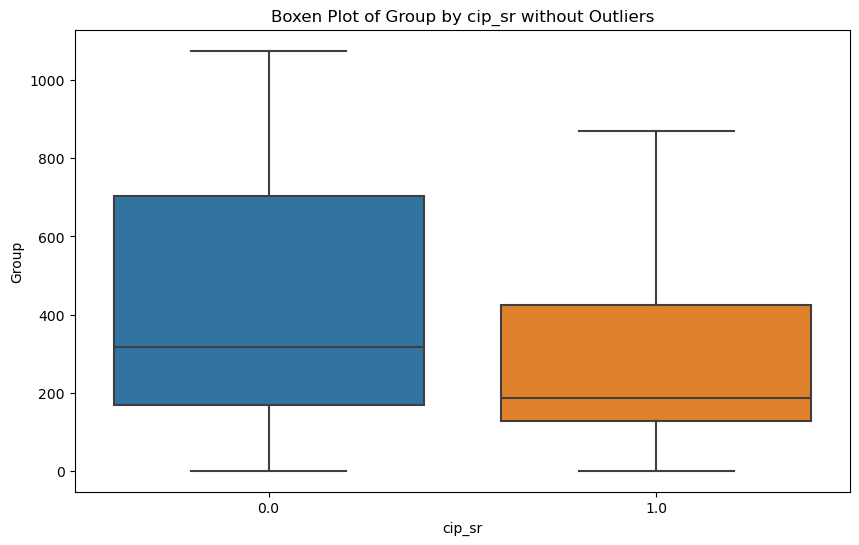

In [58]:
df_cip['cip_sr'] = pd.to_numeric(df_cip['cip_sr'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.boxplot(x='cip_sr', y='Group', data=df_cip, showfliers=False)  # Setting outlier_prop to 0 suppresses the display of outliers
plt.title('Boxen Plot of Group by cip_sr without Outliers')
plt.show()


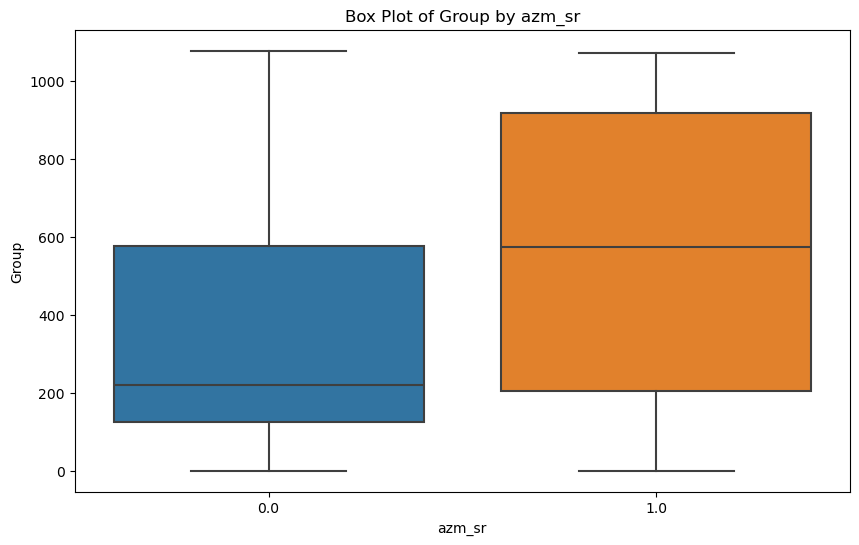

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
df_azm['azm_sr'] = pd.to_numeric(df_azm['azm_sr'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.boxplot(x='azm_sr', y='Group', data=df_azm,showfliers=False)
plt.title('Box Plot of Group by azm_sr')
plt.show()


## 3) Feature Engineering

In [60]:
x1=df_azm.iloc[:,:-1]
x2=df_cip.iloc[:,:-1]
x3=df_cfx.iloc[:,:-1]

In [61]:
y1=df_azm.iloc[:,-1]
y2=df_cip.iloc[:,-1]
y3=df_cfx.iloc[:,-1]

In [62]:
for feature in categorical:
    if feature in x1.columns:
        x1 = pd.get_dummies(x1, columns=[feature], prefix=feature, drop_first=True, dtype=int)

In [63]:
for feature in categorical:
    if feature in x2.columns:
        x2 = pd.get_dummies(x2, columns=[feature], prefix=feature, drop_first=True, dtype=int)

In [64]:
for feature in categorical:
    if feature in x3.columns:
        x3 = pd.get_dummies(x3, columns=[feature], prefix=feature, drop_first=True, dtype=int)

In [65]:
x2.columns

Index(['Group', 'cip_mic', 'Continent_America', 'Continent_Asia',
       'Continent_Europe', 'Continent_Oceania'],
      dtype='object')

In [66]:
mm1 = MinMaxScaler()
mm2 = MinMaxScaler()
mm3 = MinMaxScaler()

x1.iloc[:, [0, 1, 2]] = mm1.fit_transform(x1.iloc[:, [0, 1, 2]])
x2.iloc[:, [0, 1]] = mm2.fit_transform(x2.iloc[:, [0, 1]])
x3.iloc[:, 0] = mm3.fit_transform(x3.iloc[:, 0].values.reshape(-1, 1))

In [67]:
xtr1,xte1,ytr1,yte1=train_test_split(x1,y1,test_size=0.2)
xtr2,xte2,ytr2,yte2=train_test_split(x2,y2,test_size=0.2)
xtr3,xte3,ytr3,yte3=train_test_split(x3,y3,test_size=0.2)


Best Parameters (Logistic Regression 1, Dataset 1):  {'C': 100, 'penalty': 'l2'}
Best Cross-Validated Accuracy (Logistic Regression 1, Dataset 1): 0.9644690382081684
Test Accuracy (Logistic Regression 1, Dataset 1): 0.981159420289855
ROC AUC (Logistic Regression 1, Dataset 1): 0.9573404657697088


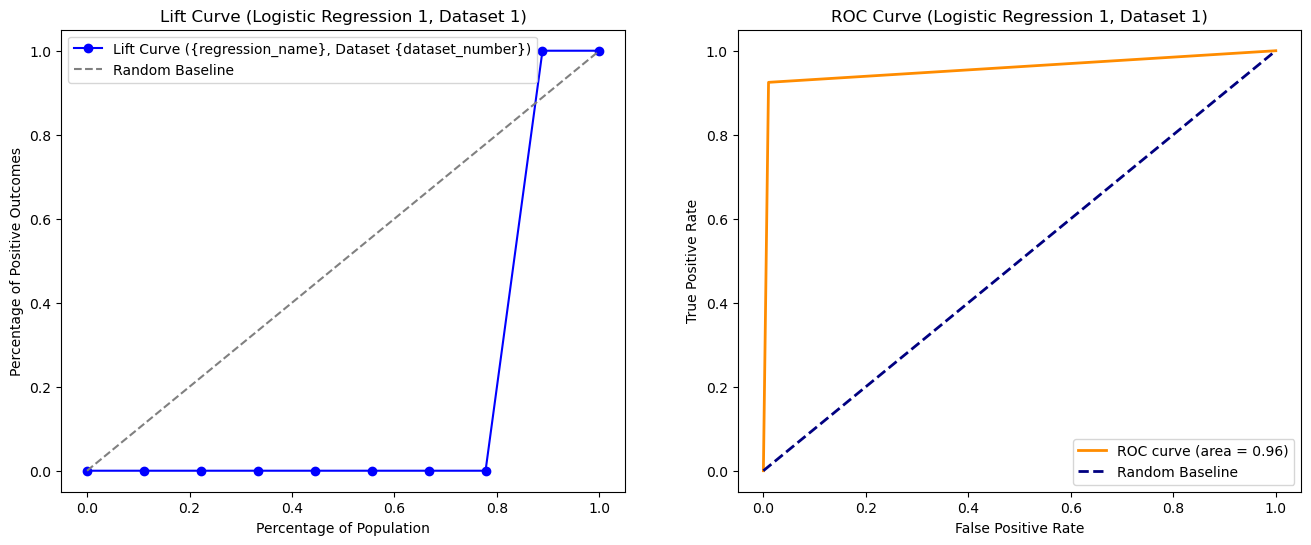


Best Parameters (Logistic Regression 2, Dataset 2):  {'C': 100, 'penalty': 'l2'}
Best Cross-Validated Accuracy (Logistic Regression 2, Dataset 2): 0.9951070184171229
Test Accuracy (Logistic Regression 2, Dataset 2): 0.993485342019544
ROC AUC (Logistic Regression 2, Dataset 2): 0.993103448275862


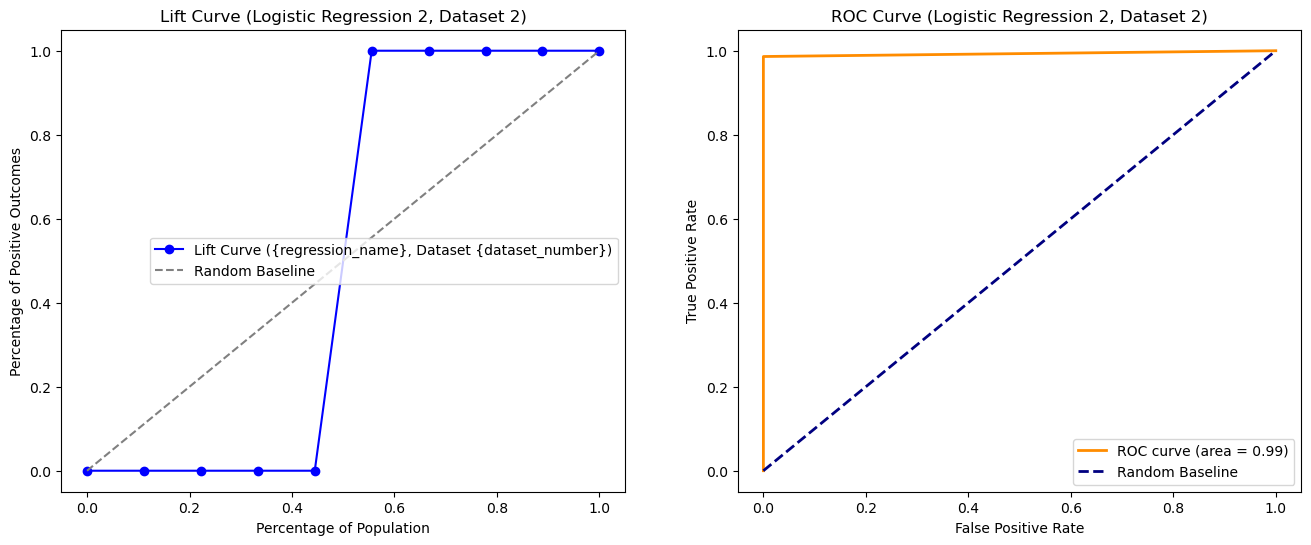

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(



Best Parameters (Logistic Regression 3, Dataset 3):  {'C': 0.1, 'penalty': 'l2'}
Best Cross-Validated Accuracy (Logistic Regression 3, Dataset 3): 1.0
Test Accuracy (Logistic Regression 3, Dataset 3): 1.0
ROC AUC (Logistic Regression 3, Dataset 3): 1.0


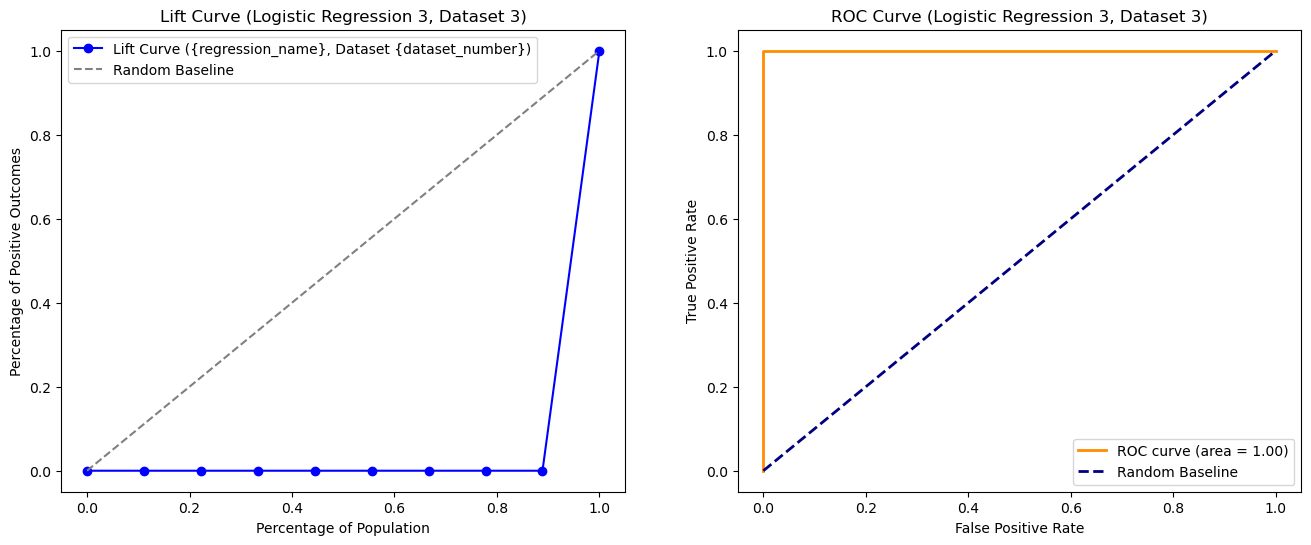

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

def perform_grid_search_logreg(x_train, y_train, x_te, y_te, dataset_number, regression_name):
    class_labels = [0, 1]
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)
    weights_dict = {class_labels[i]: weight for i, weight in enumerate(class_weights)}
    
    logreg = LogisticRegression(max_iter=1000, class_weight=weights_dict, random_state=42)
    param_grid = {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy', verbose=0, n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    print(f"\nBest Parameters ({regression_name}, Dataset {dataset_number}): ", grid_search.best_params_)
    print(f"Best Cross-Validated Accuracy ({regression_name}, Dataset {dataset_number}):", grid_search.best_score_)
    
    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(x_te)
    test_accuracy = accuracy_score(y_te, y_pred_test)
    print(f"Test Accuracy ({regression_name}, Dataset {dataset_number}):", test_accuracy)
    fpr, tpr, thresholds = roc_curve(y_te, y_pred_test)
    roc_auc = auc(fpr, tpr)
    print(f'ROC AUC ({regression_name}, Dataset {dataset_number}): {roc_auc}')
    
    num_points = 10
    lift_points = np.linspace(0, 1, num_points)
    lift_values = [np.percentile(y_pred_test, point * 100) for point in lift_points]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot Lift Curve
    axs[0].plot(lift_points, lift_values, marker='o', linestyle='-', color='b', label='Lift Curve ({regression_name}, Dataset {dataset_number})')
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')
    axs[0].set_title(f'Lift Curve ({regression_name}, Dataset {dataset_number})')
    axs[0].set_xlabel('Percentage of Population')
    axs[0].set_ylabel('Percentage of Positive Outcomes')
    axs[0].legend()

    # Plot ROC Curve
    axs[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title(f'ROC Curve ({regression_name}, Dataset {dataset_number})')
    axs[1].legend()

    plt.show()

    return grid_search

# Example usage
xtr1, xte1, ytr1, yte1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
xtr2, xte2, ytr2, yte2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xtr3, xte3, ytr3, yte3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

l1 = perform_grid_search_logreg(xtr1, ytr1, xte1, yte1, 1, 'Logistic Regression 1')
l2 = perform_grid_search_logreg(xtr2, ytr2, xte2, yte2, 2, 'Logistic Regression 2')
l3 = perform_grid_search_logreg(xtr3, ytr3, xte3, yte3, 3, 'Logistic Regression 3')


In [69]:
ypre1 = l1.predict(xte1)
accuracy_score(yte1,ypre1)

0.981159420289855

In [70]:
xte1.size

4830

In [71]:
def predictions(NG_MAST, Group, azm_mic, Continent, scaler):
    record = {'NG_MAST': NG_MAST, 'Group': Group, 'azm_mic': azm_mic,
              'Continent_America': 0, 'Continent_Asia': 0, 'Continent_Europe': 0, 'Continent_Oceania': 0}
    if Continent == 'America':
        record['Continent_America'] = 1
    elif Continent == 'Asia':
        record['Continent_Asia'] = 1
    elif Continent == 'Europe':
        record['Continent_Europe'] = 1
    elif Continent == 'Oceania':
        record['Continent_Oceania'] = 1
    input_data = pd.DataFrame(record, index=[0])
    input_data[['NG_MAST', 'Group', 'azm_mic']] = scaler.transform(input_data[['NG_MAST', 'Group', 'azm_mic']])
    input_data_for_prediction = input_data[['NG_MAST', 'Group', 'azm_mic', 'Continent_America', 'Continent_Asia', 'Continent_Europe', 'Continent_Oceania']].values.reshape(1, -1)
    yp1 = l1.predict(input_data_for_prediction)

    return yp1[0]


In [72]:
features_azm = ['NG_MAST', 'Group', 'azm_mic', 'Continent']
user_values = {}

for feature in features_azm:
    user_input = input('Enter value for {}: '.format(feature))
    if feature in ['Group', 'NG_MAST', 'azm_mic']:
        user_input = float(user_input)

    user_values[feature] = user_input

print(user_values)

p=predictions(9768,1058,512,'Europe',mm1)
if(p==1):
    print('Bacteria survives!')
else:
    print('Bacteria dead!')

Enter value for NG_MAST:  9768
Enter value for Group:  1058
Enter value for azm_mic:  512
Enter value for Continent:  Asia


{'NG_MAST': 9768.0, 'Group': 1058.0, 'azm_mic': 512.0, 'Continent': 'Asia'}
Bacteria survives!


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
def predictions_cip( Group,cip_mic, Continent, scaler):
    record = { 'Group': Group,'cip_mic': cip_mic,
              'Continent_America': 0, 'Continent_Asia': 0, 'Continent_Europe': 0, 'Continent_Oceania': 0}

    if Continent == 'America':
        record['Continent_America'] = 1
    elif Continent == 'Asia':
        record['Continent_Asia'] = 1
    elif Continent == 'Europe':
        record['Continent_Europe'] = 1
    elif Continent == 'Oceania':
        record['Continent_Oceania'] = 1
    input_data = pd.DataFrame(record, index=[0])
    columns_for_scaling = ['Group', 'cip_mic']
    input_data[columns_for_scaling] = scaler.transform(input_data[columns_for_scaling])
    input_data_for_prediction = input_data[['cip_mic', 'Group', 'Continent_America', 'Continent_Asia', 'Continent_Europe', 'Continent_Oceania']].values.reshape(1, -1)
    yp_cip = l2.predict(input_data_for_prediction)

    return yp_cip[0]


In [74]:
features_cip = ['Group', 'cip_mic', 'Continent']
user_values = {}

for feature in features_cip:
    user_input = input('Enter value for {}: '.format(feature))
    if feature in ['Group', 'cip_mic']:
        try:
            user_input = float(user_input)
        except ValueError:
            print(f"Error: {feature} must be a numeric value.")
            user_input = None

    user_values[feature] = user_input

print(user_values)
if user_values['Group'] is not None and user_values['cip_mic'] is not None:
    p = predictions_cip(user_values['Group'], user_values['cip_mic'], user_values['Continent'], mm2)
    
    if p == 1:
        print('Bacteria survives!')
    else:
        print('Bacteria dead!')
else:
    print('Prediction cannot be made due to missing or invalid input.')


Enter value for Group:  672
Enter value for cip_mic:  16
Enter value for Continent:  Europe


{'Group': 672.0, 'cip_mic': 16.0, 'Continent': 'Europe'}
Bacteria survives!


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:
def predictions_cfx(cfx_mic, Continent, scaler):
    record = {'cfx_mic': cfx_mic,
              'Continent_America': 0, 'Continent_Asia': 0, 'Continent_Europe': 0, 'Continent_Oceania': 0}

    if Continent == 'America':
        record['Continent_America'] = 1
    elif Continent == 'Asia':
        record['Continent_Asia'] = 1
    elif Continent == 'Europe':
        record['Continent_Europe'] = 1
    elif Continent == 'Oceania':
        record['Continent_Oceania'] = 1
    input_data = pd.DataFrame(record, index=[0])
    columns_for_scaling = ['cfx_mic']
    input_data[columns_for_scaling] = scaler.transform(input_data[columns_for_scaling])
    input_data_for_prediction = input_data[['cfx_mic', 'Continent_America', 'Continent_Asia', 'Continent_Europe', 'Continent_Oceania']].values.reshape(1, -1)
    yp_cfx = l3.predict(input_data_for_prediction)

    return yp_cfx[0]


In [76]:
features_cfx = ['cfx_mic', 'Continent']
user_values_cfx = {}

for feature in features_cfx:
    user_input = input('Enter value for {}: '.format(feature))
    if feature == 'cfx_mic':
        try:
            user_input = float(user_input)
        except ValueError:
            print(f"Error: {feature} must be a numeric value.")
            user_input = None

    user_values_cfx[feature] = user_input

print(user_values_cfx)

if user_values_cfx['cfx_mic'] is not None:
    p_cfx = predictions_cfx(user_values_cfx['cfx_mic'], user_values_cfx['Continent'], mm3)

    if p_cfx == 1:
        print('Bacteria survives for cfx!')
    else:
        print('Bacteria dead for cfx!')
else:
    print('Prediction for cfx cannot be made due to missing or invalid input.')


Enter value for cfx_mic:  0.125
Enter value for Continent:  Africa


{'cfx_mic': 0.125, 'Continent': 'Africa'}
Bacteria dead for cfx!


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
df2=df1[df1['Country']=='India']

In [78]:
df_azm2 = df2[[ 'NG_MAST', 'Group', 'azm_mic','Continent','azm_sr']]
df_cip2 = df2[[ 'Group','cip_mic','Continent',  'cip_sr']]
df_cfx2 = df2[[ 'cfx_mic', 'Continent', 'cfx_sr']]

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


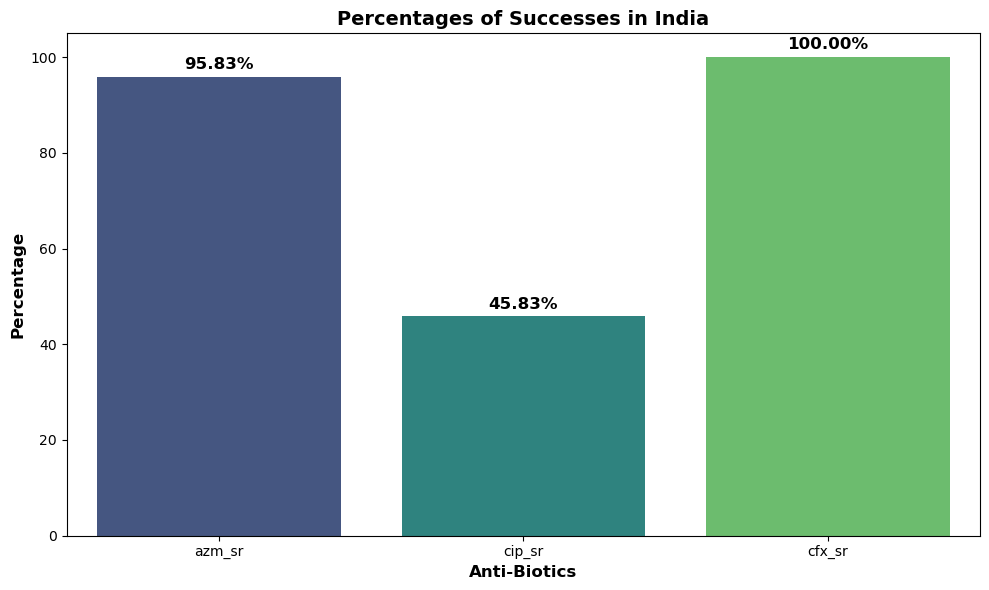

In [79]:
azm_sr_df = df_azm2[df_azm2['azm_sr'] == 0]
cip_sr_df = df_cip2[df_cip2['cip_sr'] == 0]
cfx_sr_df = df_cfx2[df_cfx2['cfx_sr'] == 0]
azm_sr_percentage = len(azm_sr_df) / len(df_azm2) * 100
cip_sr_percentage = len(cip_sr_df) / len(df_cip2) * 100
cfx_sr_percentage = len(cfx_sr_df) / len(df_cfx2) * 100

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=['azm_sr', 'cip_sr', 'cfx_sr'], y=[azm_sr_percentage, cip_sr_percentage, cfx_sr_percentage], palette="viridis")

# Highlight and increase font size of bar labels
for index, value in enumerate([azm_sr_percentage, cip_sr_percentage, cfx_sr_percentage]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=12, color='black')

# Customize plot
plt.xlabel('Anti-Biotics', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.title('Percentages of Successes in India', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## In India, Most successful is Cfx, followed by Azm and lastly Cip

In [80]:
df_azm2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1798 to 1851
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NG_MAST    24 non-null     object 
 1   Group      24 non-null     int64  
 2   azm_mic    24 non-null     float64
 3   Continent  24 non-null     object 
 4   azm_sr     24 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.regularizers import l2

model = Sequential([
    Flatten(input_shape=[7]),
    Dense(100, kernel_regularizer=l2(0.005), activation="tanh"),
    Dense(200, kernel_regularizer=l2(0.005), activation="tanh"),
    Dense(300, kernel_regularizer=l2(0.005), activation="tanh"),
    Dense(200, kernel_regularizer=l2(0.005), activation="tanh"),
    Dense(1, activation="sigmoid")
])


In [82]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [84]:
hist=model.fit(xtr1,ytr1,epochs=10,validation_data=(xte1,yte1))

Epoch 1/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 0.9050 - val_loss: 0.5404 - val_accuracy: 0.8884
Epoch 2/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.9050 - val_loss: 0.5364 - val_accuracy: 0.8884
Epoch 3/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.9050 - val_loss: 0.5411 - val_accuracy: 0.8884
Epoch 4/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5300 - accuracy: 0.9050 - val_loss: 0.5301 - val_accuracy: 0.8884
Epoch 5/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.9050 - val_loss: 0.5285 - val_accuracy: 0.8884
Epoch 6/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.9050 - val_loss: 0.5358 - val_accuracy: 0.8884
Epoch 7/10
87/87 [==============================] - 0s 1ms/step - loss: 0.5197 - accuracy: 0.9050 - val_loss: 0.5162 - val_accuracy: 0.8884
Epoch 8/10
87/87 [==

In [85]:
y=model.predict(xte1)
accuracy_score(yte1,np.where(y>0.5,1,0))

22/22 [==============================] - 0s 688us/step


0.8884057971014493

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def perform_grid_search_rf(x_train, y_train, x_te, y_te, dataset_name):
    rf_classifier = RandomForestClassifier(random_state=42)

    param_grid = {
        'n_estimators': [100],
        'criterion': ['gini'],
        'max_depth': [None],
        'max_features': ['sqrt'],
        'min_samples_split': [2],
        'min_samples_leaf': [2],
        'bootstrap': [True],
        'class_weight': ['balanced'],
        'verbose': [0]
    }

    grid_search_rf = GridSearchCV(
        rf_classifier,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )

    grid_search_rf.fit(x_train, y_train)

    print(f"\nBest Parameters ({dataset_name}): ", grid_search_rf.best_params_)
    print(f"Best Accuracy ({dataset_name}): ", grid_search_rf.best_score_)

    best_rf_model = grid_search_rf.best_estimator_
    y_pred_test_rf = best_rf_model.predict(x_te)
    test_accuracy_rf = accuracy_score(y_te, y_pred_test_rf)
    print(f"Test Accuracy ({dataset_name}):", test_accuracy_rf)

    # ROC Curve and AUC
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_te, y_pred_test_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    print(f'ROC AUC ({dataset_name}): {roc_auc_rf}')

    
    num_points_rf = 10
    lift_points_rf = np.linspace(0, 1, num_points_rf)
    lift_values_rf = [np.percentile(y_pred_test_rf, point * 100) for point in lift_points_rf]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_te, y_pred_test_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].plot(lift_points_rf, lift_values_rf, marker='o', linestyle='-', color='b', label='Lift Curve ({})'.format(dataset_name))
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')
    axs[0].set_title('Lift Curve ({})'.format(dataset_name))
    axs[0].set_xlabel('Percentage of Population')
    axs[0].set_ylabel('Percentage of Positive Outcomes')
    axs[0].legend()
    axs[1].plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve ({})'.format(dataset_name))
    axs[1].legend()

    plt.tight_layout()
    plt.show()


    return grid_search_rf
xtr1, xte1, ytr1, yte1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
xtr2, xte2, ytr2, yte2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xtr3, xte3, ytr3, yte3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

l1_rf = perform_grid_search_rf(xtr1, ytr1, xte1, yte1, 'Dataset 1')
l2_rf = perform_grid_search_rf(xtr2, ytr2, xte2, yte2, 'Dataset 2')
l3_rf = perform_grid_search_rf(xtr3, ytr3, xte3, yte3, 'Dataset 3')


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def perform_grid_search_dt(x_train, y_train, x_te, y_te, dataset_name):
    dt_classifier = DecisionTreeClassifier(random_state=42)

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': [None, 'sqrt'],
        'class_weight': ['balanced', None]
    }

    grid_search_dt = GridSearchCV(
        dt_classifier,
        param_grid,
        cv=5,
        scoring='accuracy',
        verbose=0,
        n_jobs=-1
    )

    grid_search_dt.fit(x_train, y_train)

    print(f"\nBest Parameters ({dataset_name}): ", grid_search_dt.best_params_)
    print(f"Best Accuracy ({dataset_name}): ", grid_search_dt.best_score_)

    best_dt_model = grid_search_dt.best_estimator_
    y_pred_test_dt = best_dt_model.predict(x_te)
    test_accuracy_dt = accuracy_score(y_te, y_pred_test_dt)
    print(f"Test Accuracy ({dataset_name}):", test_accuracy_dt)

    # ROC Curve and AUC
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_te, y_pred_test_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    print(f'ROC AUC ({dataset_name}): {roc_auc_dt}')

    # Lift Curve
    # Lift Curve
    num_points_dt = 10
    lift_points_dt = np.linspace(0, 1, num_points_dt)
    lift_values_dt = [np.percentile(y_pred_test_dt, point * 100) for point in lift_points_dt]

# ROC Curve and AUC
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_te, y_pred_test_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)

# Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Lift Curve
    axs[0].plot(lift_points_dt, lift_values_dt, marker='o', linestyle='-', color='b', label='Lift Curve ({})'.format(dataset_name))
    axs[0].plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Baseline')
    axs[0].set_title('Lift Curve ({})'.format(dataset_name))
    axs[0].set_xlabel('Percentage of Population')
    axs[0].set_ylabel('Percentage of Positive Outcomes')
    axs[0].legend()

# Plotting ROC Curve
    axs[1].plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Baseline')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve ({})'.format(dataset_name))
    axs[1].legend()

    plt.tight_layout()
    plt.show()


    return grid_search_dt

# Assuming x1, y1, x2, y2, x3, y3 are your datasets
xtr1, xte1, ytr1, yte1 = train_test_split(x1, y1, test_size=0.2, random_state=42)
xtr2, xte2, ytr2, yte2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
xtr3, xte3, ytr3, yte3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

l1_dt = perform_grid_search_dt(xtr1, ytr1, xte1, yte1, 'Dataset 1')
l2_dt = perform_grid_search_dt(xtr2, ytr2, xte2, yte2, 'Dataset 2')
l3_dt = perform_grid_search_dt(xtr3, ytr3, xte3, yte3, 'Dataset 3')


In [ ]:
print('Training set of Azm has ',xtr1.shape[0],' examples')
print('Test set of Azm has ',xte1.shape[0],' examples')

print('Training set of Cip has ',xtr2.shape[0],' examples')
print('Test set of Cip has ',xte2.shape[0],' examples')

print('Training set of Cfx has ',xtr3.shape[0],' examples')
print('Test set of Cfx has ',xte3.shape[0],' examples')